In [2]:
import csv 
from shapely.geometry import Point, mapping
from fiona import collection
import geopandas as gp
import matplotlib.pyplot as plt


In [3]:
with open("C:/Users/Joe/Documents/42Floors/2018-08-08_23_12_24/Houston()/houstonproperties_08_14_2018.csv", 'r', encoding='ISO-8859-1') as  f:
    reader = csv.DictReader(f)

In [4]:
#write latitude longitude in csv into shapefile, with properties
schema = { 'geometry':'Point',
           'properties':{ 'address': 'str',
                          'city': 'str',
                          'state': 'str',
                          'zipcode': 'str',
                          'walkability': 'str',
                          'walkabilitydescription': 'str',
                          'bikability': 'str',
                          'bikabilitydescription': 'str',
                          },
           
           }
with collection("Houston.shp", "w", "ESRI Shapefile", schema) as output:
    with open('C:/Users/Joe/Documents/42Floors/2018-08-08_23_12_24/Houston()/houstonproperties_08_14_2018.csv', 'r', encoding='ISO-8859-1') as f:
        reader = csv.DictReader(f)
        for row in reader:
            point = Point(float(row['lon']), float(row['lat']))
            output.write({
                'properties': {
                    'address':row['address'],
                    'city':row['city'],
                    'state':row['state'],
                    'zipcode':row['zipcode'],
                    'walkability':row['walkability'],
                    'walkabilitydescription':row['walkabilitydescription'],
                    'bikability':row['bikability'],
                    'bikabilitydescription':row['bikabilitydescription'],
                }, #add all the properties into the shapefile point!
                'geometry': mapping(point)
            })
            

In [48]:
import geopandas as gp

realestatelocations = gp.GeoDataFrame.from_file(
    'C:/Users/Joe/PycharmProjects/GIS/Houston.shp')

realestatelocations.head()

,address,city,state,zipcode,walkabilit,walkabil_1,bikability,bikabili_1,geometry
0,333 clay st,houston,tx,77002,91,Walker's Paradise,78,Very Bikeable,POINT (-95.37268 29.757614)
1,10700 richmond ave,houston,tx,77042,54,Somewhat Walkable,46,Somewhat Bikeable,POINT (-95.5633 29.727798)
2,500 dallas st,houston,tx,77002,81,Very Walkable,80,Very Bikeable,POINT (-95.37035 29.757986)
3,1000 louisiana st,houston,tx,77002,84,Very Walkable,81,Very Bikeable,POINT (-95.36756 29.758465)
4,10777 northwest fwy,houston,tx,77074,38,Car-Dependent,39,Somewhat Bikeable,POINT (-95.55343000000001 29.663622)


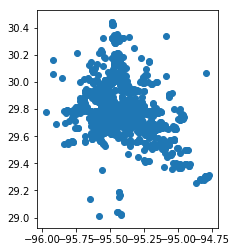

In [6]:
realestatelocations.plot()

In [7]:
import descartes
states = gp.read_file("C:/Users/Joe/Downloads/gz_2010_48_140_00_500k/gz_2010_48_140_00_500k.shp")
states.head()


,GEO_ID,STATE,COUNTY,TRACT,NAME,LSAD,CENSUSAREA,geometry
0,1400000US48029110100,48,029,110100,1101,Tract,1.364,"POLYGON ((-98.499279 29.433827, -98.4991469999..."
1,1400000US48029110300,48,029,110300,1103,Tract,0.598,"POLYGON ((-98.48687199999999 29.407662, -98.48..."
2,1400000US48029110500,48,029,110500,1105,Tract,0.450,"POLYGON ((-98.51410799999999 29.420499, -98.51..."
3,1400000US48029120300,48,029,120300,1203,Tract,1.841,"POLYGON ((-98.459284 29.480134, -98.4592739999..."
4,1400000US48029120702,48,029,120702,1207.02,Tract,1.246,"POLYGON ((-98.481872 29.491166, -98.4816079999..."


Current size: [24.0, 18.0]


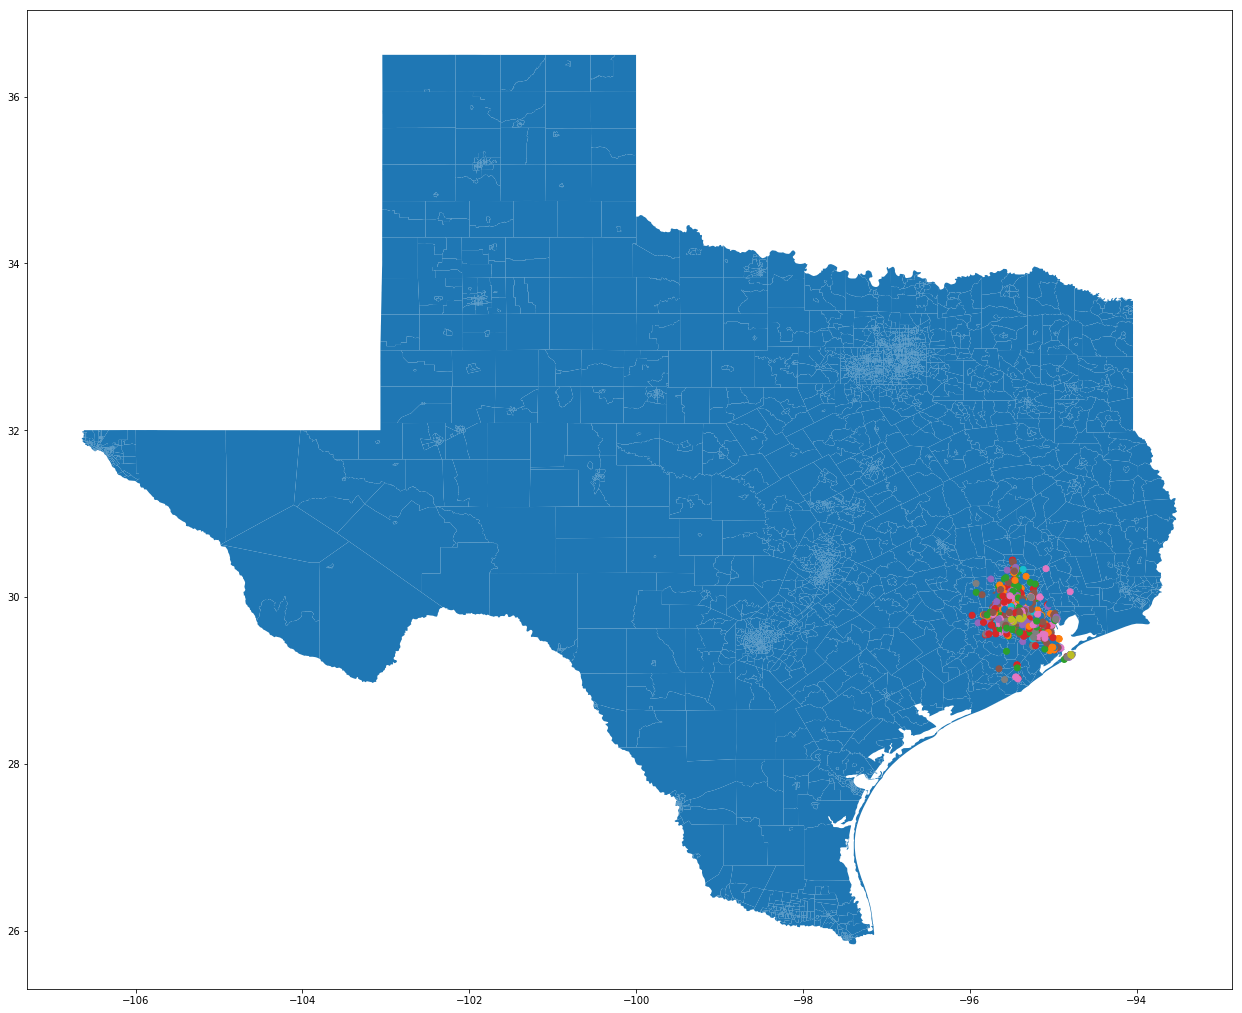

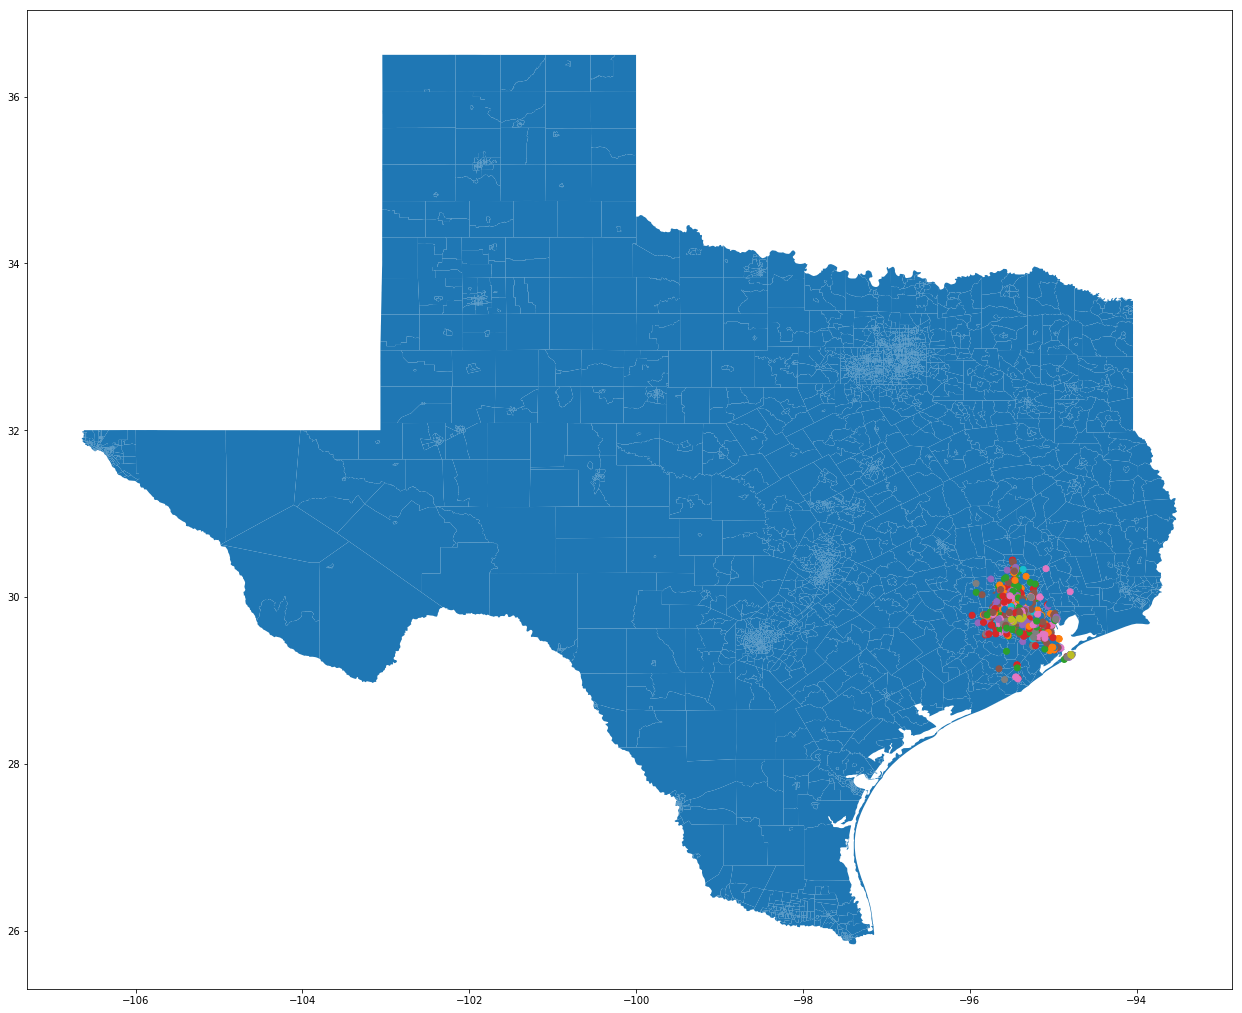

In [40]:
# Get current size

fig_size = plt.rcParams["figure.figsize"]
ax = states.plot()
realestatelocations.plot(column='walkabilit', ax=ax)
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 24
fig_size[1] = 18
plt.rcParams["figure.figsize"] = fig_size

ax = states.plot()
realestatelocations.plot(column='walkabilit', ax=ax)


TypeError: with_transform() missing 2 required positional arguments: 'x' and 'y'

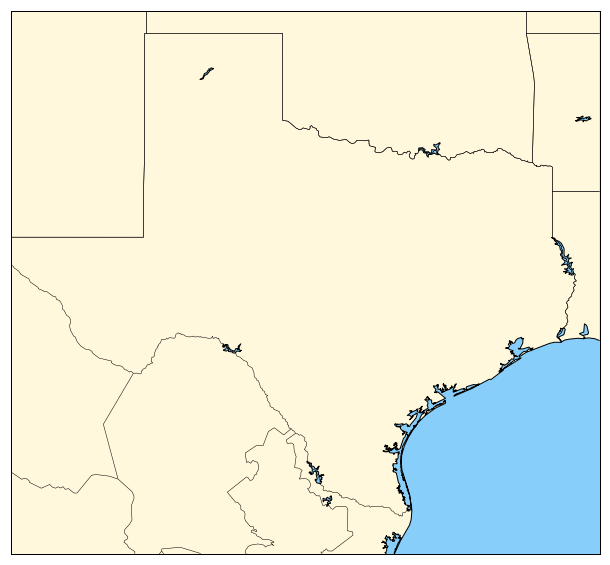

In [44]:
from mpl_toolkits.basemap import Basemap
import shapely
import numpy as np
water = 'lightskyblue'
earth = 'cornsilk'

juneau_lon, juneau_lat = -98, 29
 
fig, ax1 = plt.subplots(figsize=(12, 10))
mm = Basemap(
    width=600000, height=400000,
    resolution='i',
    projection='cyl',
    ellps='WGS84',
    llcrnrlon=-106., llcrnrlat=25.,
    urcrnrlon=-93, urcrnrlat=37.)

mask = mm.drawlsmask()
coast = mm.drawcoastlines()
state = mm.drawstates()
continents = mm.fillcontinents(
    color=earth,
    lake_color=water)
bound= mm.drawmapboundary(fill_color=water)
countries = mm.drawcountries()
juneau = mm.plot(ax=ax, color='purple', zorder=10)



In [ ]:

mask = mm.drawlsmask()
coast = mm.drawcoastlines()
state = mm.drawstates()
continents = mm.fillcontinents(
    color=earth,
    lake_color=water)
bound= mm.drawmapboundary(fill_color=water)
countries = mm.drawcountries())
x, y = mm(juneau_lon, juneau_lat)
juneau = mm.scatter(x, y, 80, color='purple', zorder=10)